# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [ ]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [ ]:
desk=df.describe()
print("Prosjecna placa: ", df['IncomePerCap'].mean())
print("Medijalna placa: ", df['IncomePerCap'].median())
desk

Prosjecna placa:  23981.771739130436
Medijalna placa:  23460.0


,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.0637621121184162, 0.0009999999999998899)


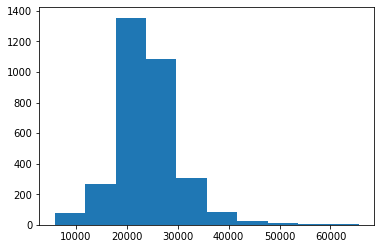

In [ ]:
income=diagnostic.kstest_normal(df['IncomePerCap'], dist='norm')
plt.hist(df['IncomePerCap'], bins=10)
print(income)
#p-vrijednost testa je manja od 0.05 pa s pouzdanošću od 95% odbacujemo nultu 
#hipotezu da podaci potječu iz normalne distribucije

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [ ]:
df['TotalPop'].describe()
#za 3220 unosa, srednja vrijednost populacije je 99409 stanovnika sa standardnom devijacijom od 319305 stanovnika
#minimalan broj stanovnika je 85, a maksimalan 10038390  

count    3.220000e+03
mean     9.940935e+04
std      3.193055e+05
min      8.500000e+01
25%      1.121800e+04
50%      2.603500e+04
75%      6.643050e+04
max      1.003839e+07
Name: TotalPop, dtype: float64

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.37787608613878587, 0.0009999999999998899)


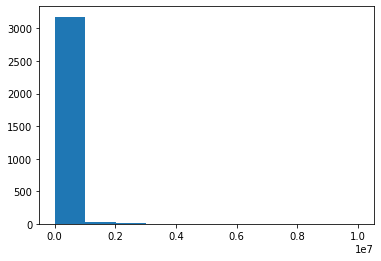

In [ ]:
pop=diagnostic.kstest_normal(df['TotalPop'], dist='norm')
plt.hist(df['TotalPop'], bins=10)
print(pop)
#p-vrijednost testa je manja od 0.05 pa s pouzdanošću od 95% odbacujemo nultu 
#hipotezu da podaci potječu iz normalne distribucije

## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

In [ ]:
stats.pearsonr(df['IncomePerCap'],df['Unemployment'])

PearsonRResult(statistic=-0.5475960044237943, pvalue=2.043834312917008e-251)

In [ ]:
stats.spearmanr(df['IncomePerCap'],df['Unemployment'])

SignificanceResult(statistic=-0.5610346008485645, pvalue=1.861766816019713e-266)

Dohodak po stanovniku je u negativnoj srednjoj korelaciji s nezaposlenošću. 

## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

In [ ]:
ny=df[df['State']=='New York']['IncomePerCap'].describe()
ca=df[df['State']=='California']['IncomePerCap'].describe()
print("New York: ", ny)
print()
print("California: ", ca)
#po srednjoj vrijednosti stanovnici države New York zarađuju malo više od stanovnika države Kalifornija
#i minimalna i maksimalna plaća stanovnika države Kalifornija su manje od plaća stanovnika države New York
#medijalna plaća stanovnika države Kalifornija je veća od stanovnika države New York
#možemo zaključiti da nema znatne razlike u zaradi

New York:  count       62.000000
mean     28189.758065
std       7196.801210
min      18456.000000
25%      24255.750000
50%      25891.000000
75%      30319.250000
max      64993.000000
Name: IncomePerCap, dtype: float64

California:  count       58.000000
mean     27902.603448
std       8672.312531
min      16143.000000
25%      21409.000000
50%      27146.500000
75%      31214.500000
max      60236.000000
Name: IncomePerCap, dtype: float64


Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [ ]:
ny_income=df[df['State']=='New York']['IncomePerCap']
ca_income=df[df['State']=='California']['IncomePerCap']
stats.ttest_ind(a=ny_income, b=ca_income, equal_var=True)
#s obzirom da je p-vrijednost (0.84) veća od 0.05, nultu hipotezu da nema značajne razlike u dohotku
#stanovnika ovih država ne odbacujemo

Ttest_indResult(statistic=0.19788117232375713, pvalue=0.8434785239169611)

## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

(26362.11277119949, 30017.40335783277)
(25622.335110090782, 30182.871786460943)


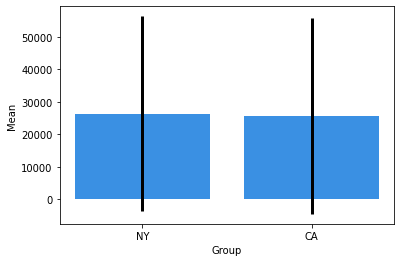

In [ ]:
ny_res=stats.t.interval(confidence=0.95, df=len(ny_income)-1, loc=np.mean(ny_income), scale=stats.sem(ny_income))
ca_res=stats.t.interval(confidence=0.95, df=len(ca_income)-1, loc=np.mean(ca_income), scale=stats.sem(ca_income))
print(ny_res)
print(ca_res)

x = pd.DataFrame([['NY', ny_res[0], ny_res[1]],['CA', ca_res[0], ca_res[1]]], columns=['Group', 'Mean', 'SD'])

ax = sns.barplot(data=x, x='Group', y='Mean', color='dodgerblue')
ax.errorbar(data=x, x='Group', y='Mean', yerr='SD', ls='', lw=3, color='black')
plt.show()

#intervali se preklapaju

## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

PearsonRResult(statistic=0.08727386609551786, pvalue=7.052861196524553e-07)


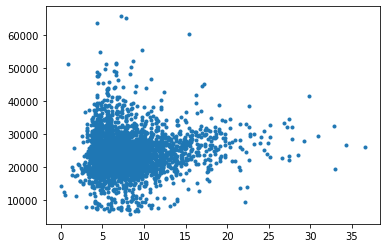

In [ ]:

plt.scatter(df['SelfEmployed'], df['IncomePerCap'], marker='.')
print(stats.pearsonr(df['SelfEmployed'],df['IncomePerCap']))

Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

PearsonRResult(statistic=-0.202293507365215, pvalue=0.0011881639322138561)


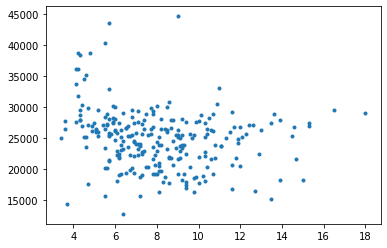

In [ ]:
skup_A=df[(df['State']=='Wisconsin') | (df['State']=='Tennessee') | (df['State']=='Minnesota')]
plt.scatter(skup_A['SelfEmployed'], skup_A['IncomePerCap'], marker='.')
print(stats.pearsonr(skup_A['SelfEmployed'],skup_A['IncomePerCap']))

PearsonRResult(statistic=-0.32905300016378525, pvalue=0.004768134887745218)


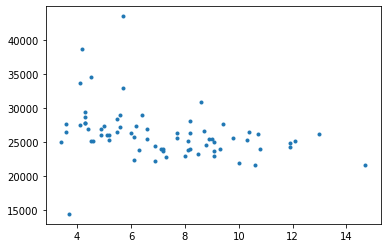

In [ ]:
win=df[df['State']=='Wisconsin']

plt.scatter(win['SelfEmployed'], win['IncomePerCap'], marker='.')
print(stats.pearsonr(win['SelfEmployed'],win['IncomePerCap']))

PearsonRResult(statistic=-0.23836048684913153, pvalue=0.020011631955528172)


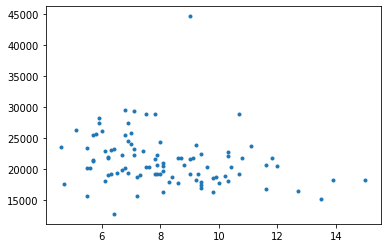

In [ ]:
ten=df[df['State']=='Tennessee']

plt.scatter(ten['SelfEmployed'], ten['IncomePerCap'], marker='.')
print(stats.pearsonr(ten['SelfEmployed'],ten['IncomePerCap']))

PearsonRResult(statistic=-0.2538551921654062, pvalue=0.017665199300911944)


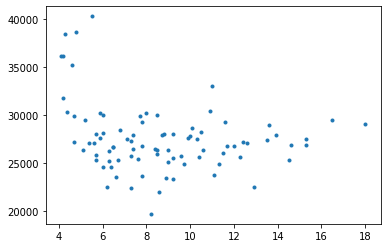

In [ ]:
min=df[df['State']=='Minnesota']

plt.scatter(min['SelfEmployed'], min['IncomePerCap'], marker='.')
print(stats.pearsonr(min['SelfEmployed'],min['IncomePerCap']))

U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

In [ ]:
# u sve tri države opažen je negativan učinak, a najveći je učinak za državu Wisconsin 
# iako se ne razlikuje znatno od ostala dva 

Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

PearsonRResult(statistic=-0.2322214134608569, pvalue=0.007607493042857383)


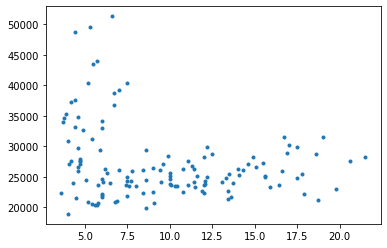

In [ ]:
skup_B=df[(df['State']=='New Jersey') | (df['State']=='Kansas') | (df['State']=='Rhode Island')]
plt.scatter(skup_B['SelfEmployed'], skup_B['IncomePerCap'], marker='.')
print(stats.pearsonr(skup_B['SelfEmployed'],skup_B['IncomePerCap']))

PearsonRResult(statistic=0.48044784713362815, pvalue=0.027488944757806215)


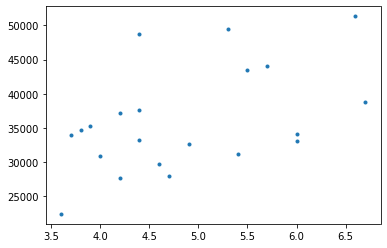

In [ ]:
new=df[df['State']=='New Jersey']

plt.scatter(new['SelfEmployed'], new['IncomePerCap'], marker='.')
print(stats.pearsonr(new['SelfEmployed'],new['IncomePerCap']))

PearsonRResult(statistic=0.25810299714436924, pvalue=0.007853351846832413)


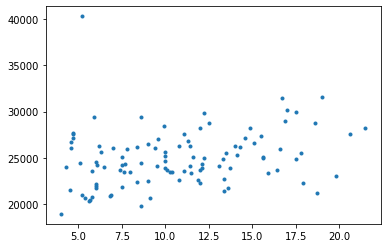

In [ ]:
kan=df[df['State']=='Kansas']

plt.scatter(kan['SelfEmployed'], kan['IncomePerCap'], marker='.')
print(stats.pearsonr(kan['SelfEmployed'],kan['IncomePerCap']))

PearsonRResult(statistic=0.9021788382149803, pvalue=0.0361831020157593)


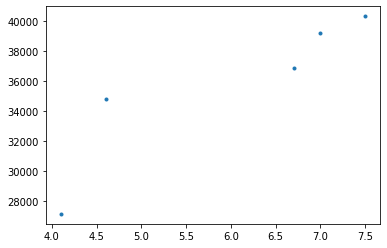

In [ ]:
rhi=df[df['State']=='Rhode Island']

plt.scatter(rhi['SelfEmployed'], rhi['IncomePerCap'], marker='.')
print(stats.pearsonr(rhi['SelfEmployed'],rhi['IncomePerCap']))

In [ ]:
# najveći je učinak zapažen u državi Rhode Island s pozitivnom jakom korelacijom između samozapošljavanja i dohotka po stanovniku 

# preporučila bih samozapošljavanje u skupu B jer je korelacija pozitivna

# primjećujem da ako gledamo korelaciju za cijeli skup tada ne bih preporučila zapošljavanje, ali ako gledam posebno za svaku državu preporučila bih samozapošljavanje

In [ ]:



















svm_poly2 = SVC(kernel='poly', degree=2, random_state=1)
svm_poly2.fit(X_train, y_train)





# SVM s polinomijalnom jezgrom stupnja 2
y_train_pred_poly2 = svm_poly2.predict(X_train)
y_test_pred_poly2 = svm_poly2.predict(X_test)

print('SVM s polinomijalnom jezgrom stupnja 2:')
print('Train CAC:', accuracy_score(y_train, y_train_pred_poly2))
print('Test CAC:', accuracy_score(y_test, y_test_pred_poly2))
print('Train Precision:', precision_score(y_train, y_train_pred_poly2))
print('Test Precision:', precision_score(y_test, y_test_pred_poly2))
print('Train Recall:', recall_score(y_train, y_train_pred_poly2))
print('Test Recall:', recall_score(y_test, y_test_pred_poly2))
print('Train F1:', f1_score(y_train, y_train_pred_poly2))
print('Test F1:', f1_score(y_test, y_test_pred_poly2))
print('---')

#Kao što možemo vidjeti iz tablice, model s polinomijalnom jezgrom stupnja 2 ima bolju točnost i performanse od modela s linearnom jezgrom. 



from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
params = {'C': [0.1, 1, 101, 100]}
grid = GridSearchCV(svm, params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
#Ovaj kod će isprobati 4 različite vrijednosti za C (0.1, 1, 101, 100) te će odabrati onu koja daje najbolje rezultate na skupu za validaciju.








# Izračun mjera na podskupu za trening
y_train_pred = dt.predict(X_train)
train_cac = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Train set
y_train_pred = dt.predict(X_train)
print('Train set:')
print('CAC:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1:', f1_score(y_train, y_train_pred))







# Izračun mjera na podskupu za test
y_test_pred = dt.predict(X_test)
test_cac = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

y_test_pred = dt.predict(X_test)
print('Test set:')
print('CAC:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1:', f1_score(y_test, y_test_pred))





depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=1)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel('Depth')
plt.ylabel('CAC')
plt.legend()
plt.show()
